In [1]:
import exoplasim as exo
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#MPI version: comment this out if you don't have an OpenMPI-enabled compiler (e.g. mpif90)
earth = exo.Model(workdir="earth",modelname="earth",resolution="T21",ncpus=4,layers=10,precision=8)
#Single-core version: uncomment if you don't have OpenMPI
#earth = exo.Model(workdir="earth",modelname="earth",resolution='T21',ncpus=1,layers=10,precision=8)

Checking for /home/adiv/.local/lib/python2.7/site-packages/exoplasim/plasim/run/most_plasim_t21_l10_p4.x....


In [3]:
earth.configure()

Mean Molecular Weight set to 28.9703 g/mol


In [4]:
earth.exportcfg()

Writing configuration....
1
1367.0
None
None

287.0000002469167
1.011
1
0
1.0
0
180.0
None
9.80665
1.0
None
None
None
0
None
1
0
0
None
8.0
8
15.0
None
None
None
None
None
None
None
50.0
None
0
None
None
None
ECHAM-3
0
None
0
0
None
0
1
None
1.0
50.0
None
None
0
None
45.0
None
None
toggle|0&start|320&end|576&interval|4
None

None
None
0
4
VITHRESH|0.145&GPITHRESH|0.37&VMXTHRESH|33.0&LAVTHRESH|1.2e-05&VRMTHRESH|0.577&MINSURFTEMP|298.15&MAXSURFTEMP|373.15&WINDTHRESH|33.0&SWINDTHRESH|20.5&SIZETHRESH|30&ENDTHRESH|16&MINSTORMLEN|256&MAXSTORMLEN|1024&NKTRIGGER|0&toggle|0

None
0&2.0&-1.0
0.0005
0.0
None
None
0.0
Writing to /home/adiv/astro/distbench/test/earth/earth.cfg....


In [5]:
earth.run(years=1,clean=False) #clean=False leaves the original output file in place

In [6]:
ts = earth.inspect("ts",tavg=True)

In [7]:
lon = earth.inspect("lon")
lat = earth.inspect("lat")

Text(0.5, 1.0, 'Surface Temperature')

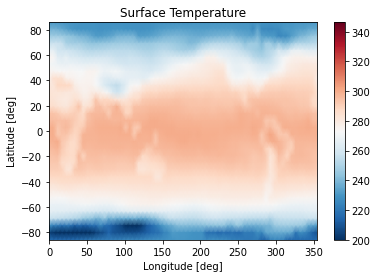

In [8]:
plt.pcolormesh(lon,lat,ts,cmap='RdBu_r',vmin=200.0,vmax=273.15+73.15,shading='Gouraud')
plt.colorbar()
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.title("Surface Temperature")

Text(0.5, 1.0, 'Streamfunction')

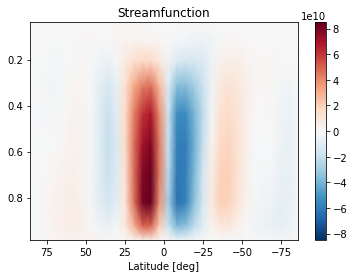

In [9]:
stf = np.nanmean(earth.inspect("stf"),axis=(0,3))
lev = earth.inspect("lev")
plt.pcolormesh(lat,lev,stf,cmap='RdBu_r',shading='Gouraud',vmin=-abs(stf).max(),vmax=abs(stf).max())
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()
plt.xlabel("Sigma Level")
plt.xlabel("Latitude [deg]")
plt.title("Streamfunction")

In [10]:
import exoplasim.pyburn as pyburn

In [11]:
pyburn.postprocess("earth/MOST.00000","earth/MOST.00000_pyburn.nc",logfile="pyburnlog.txt",times=6)

In [13]:
import exoplasim.gcmt as gcmt

In [14]:
ncd = gcmt.load("earth/MOST.00000_pyburn.nc")

Text(0.5, 1.0, 'Streamfunction')

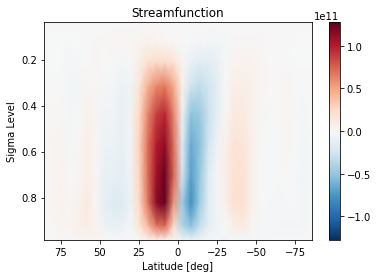

In [15]:
strf = np.nanmean(ncd.variables['stf'][-1,...],axis=-1)
plt.pcolormesh(lat,ncd.variables['lev'],strf,cmap='RdBu_r',shading='Gouraud',vmin=-abs(strf).max(),vmax=abs(strf).max())
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude [deg]")
plt.ylabel("Sigma Level")
plt.title("Streamfunction")

In [16]:
proxb = exo.TLaquaplanet(workdir="proximab",modelname="proxima_b",resolution='T21',layers=10,ncpus=4,precision=8,outputtype='.nc')

Checking for /home/adiv/.local/lib/python3.6/site-packages/exoplasim/plasim/run/most_plasim_t21_l10_p4.x....


In [17]:
proxb.configure(startemp=3000.0, flux=1300.0,rotationperiod=11.2)

Mean Molecular Weight set to 28.9703 g/mol


In [18]:
proxb.exportcfg()

Writing configuration....
1
1300.0
3000.0
None

287.0000002469167
1.011
1
0
11.2
1
180.0
None
9.80665
1.0
0.0
0.0
None
1
None
1
0
0
gp|exp|sp
8.0
8
15.0
None
None
None
None
None
None
None
50.0
None
0
None
None
None
ECHAM-3
0
None
1
0
None
0
0
None
1.0
50.0
None
None
0
None
30.0
None
None
toggle|0&start|320&end|576&interval|4
720

None
None
0
4
VITHRESH|0.145&GPITHRESH|0.37&VMXTHRESH|33.0&LAVTHRESH|1.2e-05&VRMTHRESH|0.577&MINSURFTEMP|298.15&MAXSURFTEMP|373.15&WINDTHRESH|33.0&SWINDTHRESH|20.5&SIZETHRESH|30&ENDTHRESH|16&MINSTORMLEN|256&MAXSTORMLEN|1024&NKTRIGGER|0&toggle|0

None
0&2.0&-1.0
0.0005
0.0
None
None
0.0
Writing to /home/adiv/astro/distbench/test/proximab/proxima_b.cfg....


In [19]:
proxb.cfgpostprocessor(ftype='regular',extension='.nc',mode='synchronous',physfilter=True)
proxb.cfgpostprocessor(ftype='snapshot',extension='.nc',mode='synchronous',physfilter=True)

In [20]:
proxb.run(clean=False)

In [21]:
ncd = gcmt.load("proximab/MOST.00000.nc")

In [22]:
lon = ncd.variables['lon']
lat = ncd.variables['lat']
ts = ncd.variables['ts']
prw = ncd.variables['prw']

Text(0.5, 1.0, 'Surface Temperature')

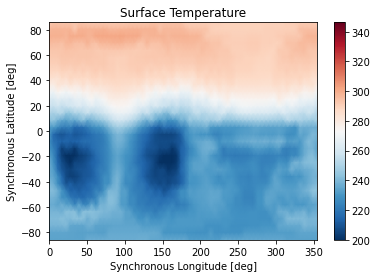

In [23]:
plt.pcolormesh(lon,lat,ts[-1,...],cmap='RdBu_r',vmin=200.0,vmax=273.15+73.15,shading='Gouraud')
plt.colorbar()
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("Surface Temperature")

Text(0.5, 1.0, 'Water Column')

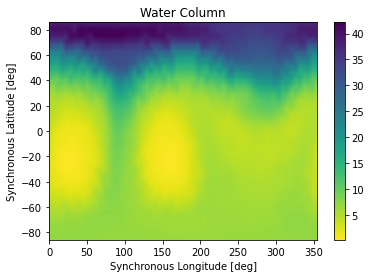

In [24]:
plt.pcolormesh(lon,lat,prw[-1,...],cmap='viridis_r',shading='Gouraud')
plt.colorbar()
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("Water Column")

Text(0.5, 1.0, 'Cloud Fraction')

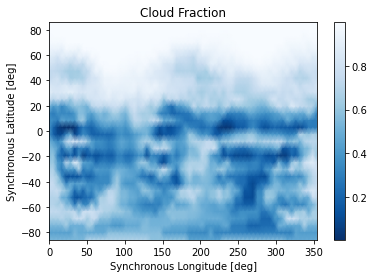

In [25]:
plt.pcolormesh(lon,lat,ncd.variables['clt'][-1,...],cmap='Blues_r',shading='Gouraud')
plt.colorbar()
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("Cloud Fraction")

Text(0.5, 1.0, 'Net Surface Shortwave Radiation')

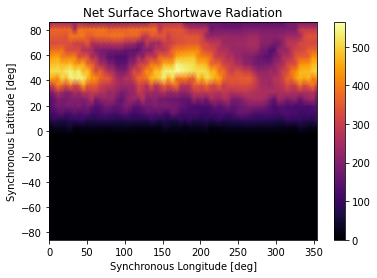

In [26]:
plt.pcolormesh(lon,lat,ncd.variables['rss'][-1,...],cmap='inferno',shading='Gouraud')
plt.colorbar()
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("Net Surface Shortwave Radiation")

Text(0.5, 1.0, '500 hPa Wind')

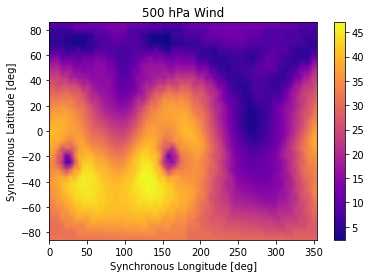

In [27]:
plt.pcolormesh(lon,lat,ncd.variables['spd'][-1,5,...],cmap='plasma',shading='Gouraud')
plt.colorbar()
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("500 hPa Wind")

Text(0.5, 1.0, '500 hPa Zonal Wind')

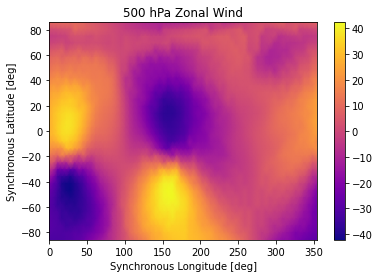

In [28]:
plt.pcolormesh(lon,lat,ncd.variables['ua'][-1,5,...],cmap='plasma',shading='Gouraud')
plt.colorbar()
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("500 hPa Zonal Wind")

Text(0.5, 1.0, '500 hPa Meridional Wind')

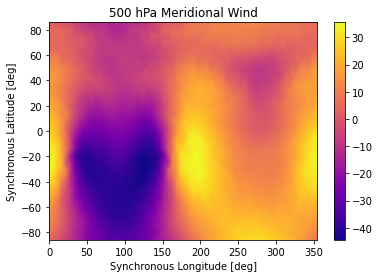

In [29]:
plt.pcolormesh(lon,lat,ncd.variables['va'][-1,5,...],cmap='plasma',shading='Gouraud')
plt.colorbar()
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("500 hPa Meridional Wind")

Text(0.5, 1.0, '500 hPa Streamlines')

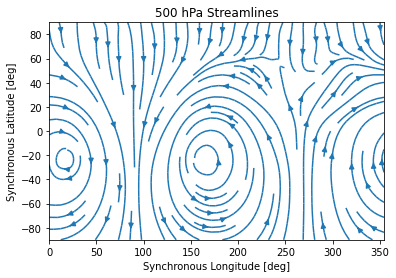

In [30]:
plt.streamplot(lon,np.linspace(90,-90,num=32)[::-1],(ncd.variables['ua'][:])[-1,2,::-1,:],(ncd.variables['va'][:])[-1,2,::-1,:])
plt.xlabel("Synchronous Longitude [deg]")
plt.ylabel("Synchronous Latitude [deg]")
plt.title("500 hPa Streamlines")

Text(0.5, 1.0, 'Synchronous Streamfunction')

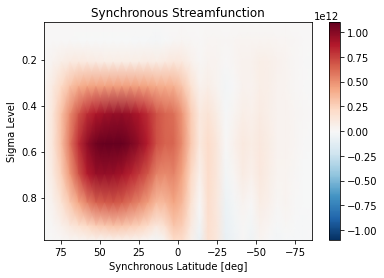

In [31]:
strf = np.nanmean(ncd.variables['stf'][-1,...],axis=-1)
plt.pcolormesh(lat,ncd.variables['lev'],strf,cmap='RdBu_r',shading='Gouraud',vmin=-abs(strf).max(),vmax=abs(strf).max())
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Synchronous Latitude [deg]")
plt.ylabel("Sigma Level")
plt.title("Synchronous Streamfunction")